# Practical 1 - Motion Estimation

## Setup

### Import necessay libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Import images

#### Utility functions

In [14]:
def load_image(path: str) -> np.ndarray:
    """
    Load image from path and convert it to RGB
    :param path: path to image
    :return: image in RGB
    """
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def display_image(img: np.ndarray, title: str = "") -> None:
    """
    Display image with matplotlib
    :param img: image to display
    :param title: title of the image
    """
    plt.imshow(img)
    plt.title(title)
    plt.show()

#### Load images and display chosen samples

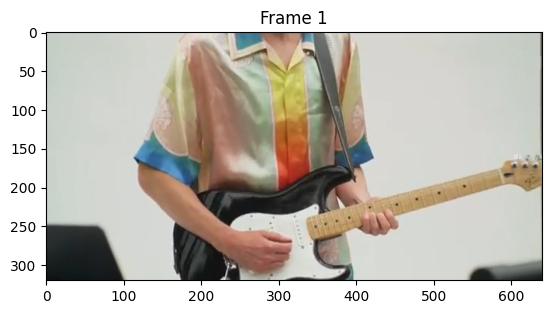

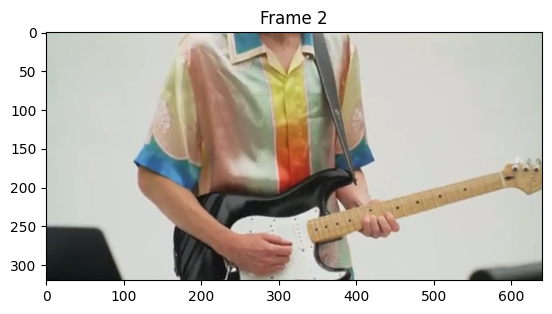

In [15]:
frame1: np.ndarray = load_image("./images/LF000.jpg")
display_image(frame1, "Frame 1")

frame2: np.ndarray = load_image("./images/LF001.jpg")
display_image(frame2, "Frame 2")

## A - Lucas-Kanade with colored images

### Traversal: Surrounding pixels

In [16]:
# Spatial gradient
def spatial_gradient(img: np.ndarray) -> np.ndarray:
    """
    Compute spatial gradient of an image
    :param img: image to compute spatial gradient
    :return: spatial gradient
    """
    g_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    g_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    return np.array([g_x.reshape(g_x.shape[0] * g_x.shape[1], 3), g_y.reshape(g_y.shape[0] * g_y.shape[1], 3)])

# Temporal gradient
def temporal_gradient(img1: np.ndarray, img2: np.ndarray) -> np.ndarray:
    """
    Compute temporal gradient of two images
    :param img1: first image
    :param img2: second image
    :return: temporal gradient
    """
    return (img2 - img1).reshape(img1.shape[0] * img1.shape[1], 3)

In [17]:
# Compute optical flow
def optical_flow(frame1: np.ndarray, frame2: np.ndarray) -> np.ndarray:
    """
    Compute optical flow
    :param g_x: spatial gradient in x
    :param g_y: spatial gradient in y
    :param g_t: temporal gradient
    :return: optical flow
    """
    g_x, g_y = spatial_gradient(frame1)
    g_t = temporal_gradient(frame1, frame2)

    u = np.zeros_like(g_x)
    v = np.zeros_like(g_x)

    # TODO: Compute optical flow with loop over every pixel
    nb_pixels = g_x.shape[0]

    A_r = np.array([g_x[:, 0].reshape(nb_pixels), g_y[:, 0].reshape(nb_pixels)]).T
    b_r = - g_t[:, 0].reshape(nb_pixels, 1)

    A_g = np.array([g_x[:, 1].reshape(nb_pixels), g_y[:, 1].reshape(nb_pixels)])
    b_g = g_t[:, 1].reshape(nb_pixels)

    A_b = np.array([g_x[:, 2].reshape(nb_pixels), g_y[:, 2].reshape(nb_pixels)])
    b_b = g_t[:, 2].reshape(nb_pixels)

    v_temp = np.linalg.inv(A_r.T @ A_r) @ A_r.T @ b_r

    return u, v
    

u, v = optical_flow(frame1=frame1, frame2=frame2)

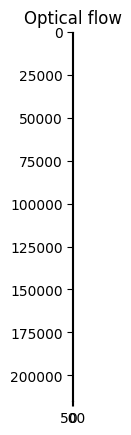

In [18]:
# Display optical flow
def display_optical_flow(u: np.ndarray, v: np.ndarray) -> None:
    """
    Display optical flow
    :param u: optical flow in x
    :param v: optical flow in y
    """
    plt.title("Optical flow")
    
    plt.imshow(frame1, cmap="gray")
    plt.quiver(u, v)
    
    plt.show()

display_optical_flow(u, v)